# Clustering Credit Card Customer
## Data preparation
## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [104]:
ds = pd.read_csv('BankChurners.csv')
ds.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
ds = ds.iloc[:,1:-2]
ds

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62



## Clustering
## K Means

<AxesSubplot:>

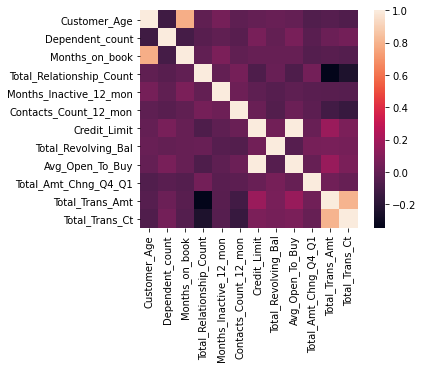

In [8]:
corr = ds.corr()
sns.heatmap(corr, square=True)

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [12]:
X = ds.iloc[:,[16,17]].values

These are the attributes that I will be using to seperate the client into cluster:
- Total_Trans_Amt - Total amount of transactions made in the last year.
- Total_Trans_Ct - Number of transactions made in the last year.

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [14]:
ss = StandardScaler()
XX = ss.fit_transform(X)
XX

array([[-0.95970657, -0.97389518],
       [-0.91643261, -1.35734038],
       [-0.74098169, -1.91120566],
       ...,
       [ 1.73299393, -0.20700479],
       [ 1.17484807, -0.12179474],
       [ 1.73387707, -0.16439977]])

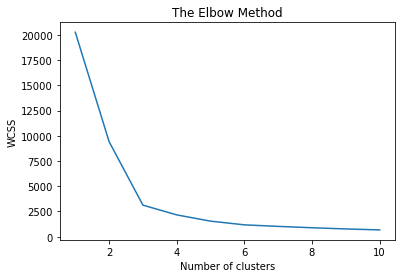

In [71]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(XX)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [72]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(XX)
y_kmeans

array([1, 1, 1, ..., 2, 2, 2])

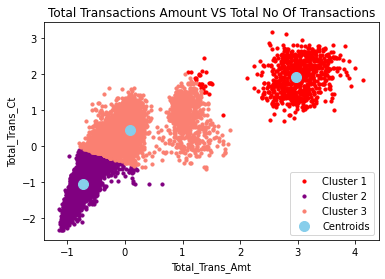

In [73]:
plt.scatter(XX[y_kmeans == 0, 0], XX[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(XX[y_kmeans == 1, 0], XX[y_kmeans == 1, 1], s = 10, c = 'purple', label = 'Cluster 2')
plt.scatter(XX[y_kmeans == 2, 0], XX[y_kmeans == 2, 1], s = 10, c = 'salmon', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'skyblue', label = 'Centroids')
plt.title('Total Transactions Amount VS Total No Of Transactions')
plt.xlabel('Total_Trans_Amt')
plt.ylabel('Total_Trans_Ct')
plt.legend()
plt.show
plt.savefig("Credit_Card_Kmeans.png", dpi=300)

In [74]:
score = silhouette_score(XX, kmeans.labels_, metric = 'euclidean')
print(score)

0.6110049517629068


## DBSCAN

## Option 1: Plot all eps

In [99]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

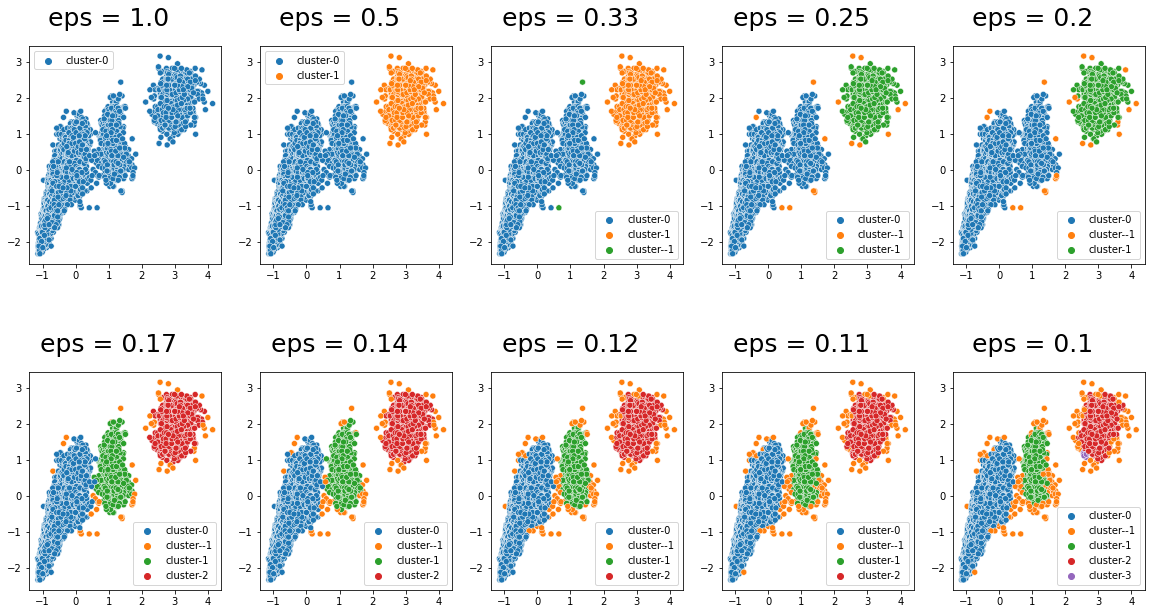

In [100]:
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i= 1
for x in range(10, 0, -1):
    eps = 1/(11-x)
    db= DBSCAN(eps=eps, min_samples=8).fit(XX)
    core_samples_mask= np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 2)), fontsize=25, ha="center")
    sns.scatterplot(XX[:,0], XX[:,1], hue=["cluster-{}".format(x) for x in labels])
    i+= 1

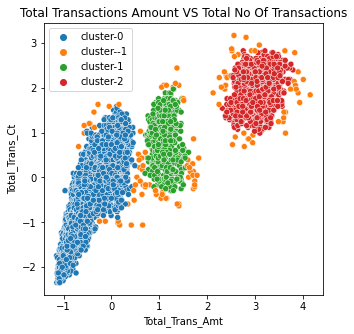

In [101]:
db= DBSCAN(eps=0.13, min_samples=8).fit(XX)
labels = db.labels_
fig = plt.figure(figsize=(5, 5))
sns.scatterplot(XX[:,0], XX[:,1], hue=["cluster-{}".format(x) for x in labels])
plt.title('Total Transactions Amount VS Total No Of Transactions')
plt.xlabel('Total_Trans_Amt')
plt.ylabel('Total_Trans_Ct')
plt.legend()
plt.savefig("Credit_Card_DBSCAN(1).png", dpi=300)

In [107]:
clusters = db.labels_
ds['cluster'] = clusters
DBSCAN1 = ds.groupby('cluster')['CLIENTNUM'].sum()

## Option 2: Knee knee locater

Text(0, 0.5, 'Distance')

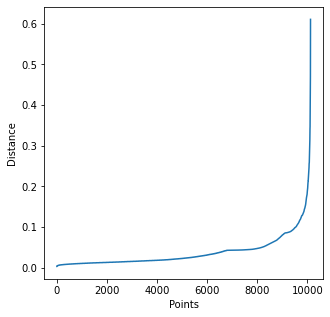

In [89]:
nearest_neighbors= NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(XX)
distances, indices = neighbors.kneighbors(XX)
distances = np.sort(distances[:,10], axis=0)
i= np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.07243625486760386


<Figure size 360x360 with 0 Axes>

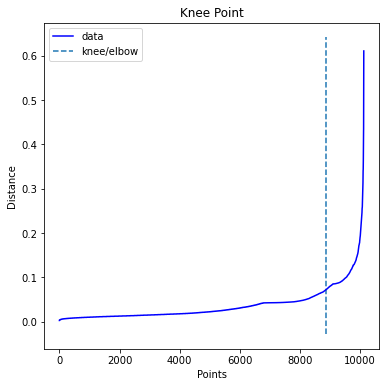

In [90]:
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

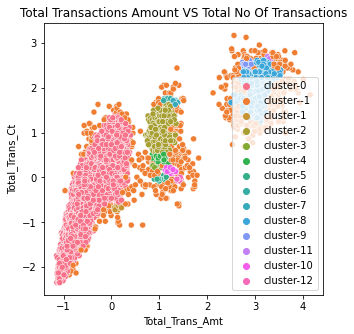

In [91]:
db= DBSCAN(eps=distances[knee.knee], min_samples=8).fit(XX)
labels = db.labels_
fig = plt.figure(figsize=(5, 5))
sns.scatterplot(XX[:,0], XX[:,1], hue=["cluster-{}".format(x) for x in labels])
plt.title('Total Transactions Amount VS Total No Of Transactions')
plt.xlabel('Total_Trans_Amt')
plt.ylabel('Total_Trans_Ct')
plt.legend()
plt.savefig("Credit_Card_DBSCAN(2).png", dpi=300)

From all the clustering model that has been conducted, DBSCAN option 1 is the most suitable clustering model for this type of dataset. Its able to distinguish the cluster correctly and can be seperated into 4 cluster. Cluster 0 is credit card client that is low spender, Cluster 1 is credit card client that is medium spender and Cluster 2 is credit card client that is high spender.

### Updated dataset with no of cluster:

In [108]:
ds.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,cluster
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,0
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994,0
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988,0
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991,0
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996,0
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970,0


### No of customer with each cluster:

In [109]:
DBSCAN1

cluster
-1      83181383862
 0    6405671819880
 1     478001522100
 2     518796893499
Name: CLIENTNUM, dtype: int64